<a href="https://colab.research.google.com/github/PhonxayMax/Math-and-Architectures-of-Deep-Learning/blob/main/CH10_1dconv_with_custom_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Listing 10.1 PyTorch code for 1D local averaging convolution**

In [1]:
import torch

In [2]:
x = torch.tensor([-1., 4., 11., 14., 21., 25., 30.])

In [3]:
w = torch.tensor([0.33, 0.33, 0.33])

In [4]:
x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

In [5]:
conv1d = torch.nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=0, bias=False)

In [6]:
conv1d.weight = torch.nn.Parameter(w, requires_grad=False)

In [7]:
with torch.no_grad():
    y = conv1d(x)

y จะเป็นค่าเฉลี่ยแบบเลื่อน 3 จุดจากเวกเตอร์ x ที่ให้มา — เป็นการ smooth หรือ ลด noise บนข้อมูลต้นฉบับ

In [8]:
y

tensor([[[ 4.6200,  9.5700, 15.1800, 19.8000, 25.0800]]])

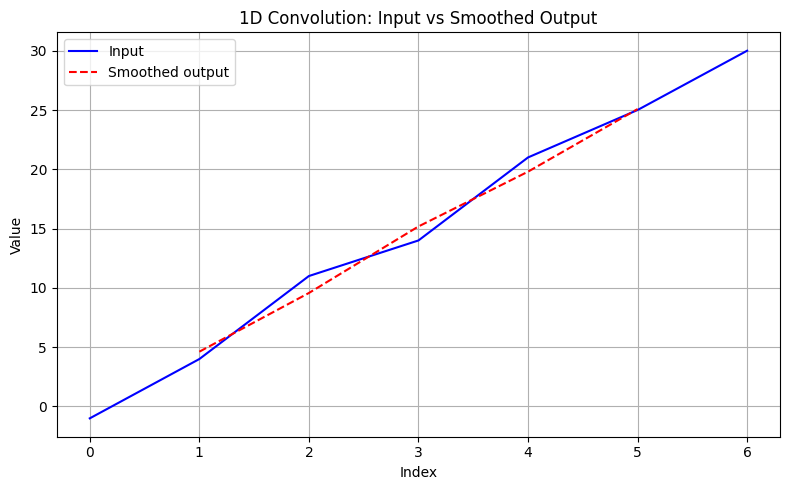

In [9]:
import torch
import matplotlib.pyplot as plt

# Step 1: Define input and smoothing kernel
x = torch.tensor([-1., 4., 11., 14., 21., 25., 30.])
w = torch.tensor([0.33, 0.33, 0.33])

# Step 2: Reshape to match Conv1d expectations: [batch_size, channels, sequence_length]
x_reshaped = x.unsqueeze(0).unsqueeze(0)
w_reshaped = w.unsqueeze(0).unsqueeze(0)

# Step 3: Create Conv1d layer manually and set weights
conv1d = torch.nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=0, bias=False)
conv1d.weight = torch.nn.Parameter(w_reshaped, requires_grad=False)

# Step 4: Apply convolution
with torch.no_grad():
    y = conv1d(x_reshaped)

# Step 5: Plot results
x_np = x.numpy()
y_np = y.squeeze().numpy()

plt.figure(figsize=(8, 5))
plt.plot(range(len(x_np)), x_np, label='Input', color='blue')
plt.plot(range(1, len(y_np) + 1), y_np, label='Smoothed output', linestyle='--', color='red')
plt.title('1D Convolution: Input vs Smoothed Output')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##**Listing 10.2 PyTorch code for 1D edge detection**

In [10]:
import torch

In [11]:
x = torch.tensor([10., 11., 9., 10., 101., 99., 100., 101., 9., 10., 11., 10.])

In [12]:
w = torch.tensor([0.5, -0.5])

In [13]:
x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

In [14]:
conv1d = torch.nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=[0], bias=False)

In [15]:
conv1d.weight = torch.nn.Parameter(w, requires_grad=False)

In [16]:
with torch.no_grad():
    y = conv1d(x)

In [17]:
y

tensor([[[ -0.5000,   1.0000,  -0.5000, -45.5000,   1.0000,  -0.5000,  -0.5000,
           46.0000,  -0.5000,  -0.5000,   0.5000]]])

##**Listing 10.3 PyTorch code directly invoking the convolution function**

In [18]:
import torch

In [19]:
x = torch.tensor([10., 11., 9., 10., 101., 99., 100., 101., 9., 10., 11., 10.])

In [20]:
w = torch.tensor([0.5, -0.5])

In [21]:
x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

In [22]:
y = torch.nn.functional.conv1d(x, w, stride=1)

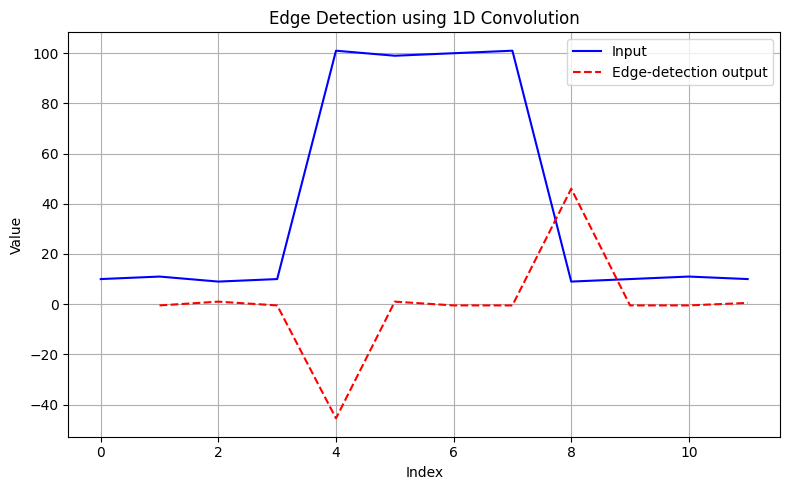

In [23]:
import torch
import matplotlib.pyplot as plt

# Define input signal (same as Listing 10.3)
x = torch.tensor([10., 11., 9., 10., 101., 99., 100., 101., 9., 10., 11., 10.])
w = torch.tensor([0.5, -0.5])  # Edge detection kernel

# Reshape to [batch, channels, length]
x = x.unsqueeze(0).unsqueeze(0)
w = w.unsqueeze(0).unsqueeze(0)

# Apply convolution using torch.nn.functional
y = torch.nn.functional.conv1d(x, w, stride=1)

# Convert to numpy for plotting
x_np = x.squeeze().numpy()
y_np = y.squeeze().numpy()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(len(x_np)), x_np, label='Input', color='blue')
plt.plot(range(1, len(y_np) + 1), y_np, '--', label='Edge-detection output', color='red')
plt.title('Edge Detection using 1D Convolution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
